**Import Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# **Understanding Data**

In [2]:
# df = pd.read_csv('/content/oasis_longitudinal (1).csv')
df = pd.read_csv(r"MRI/oasis_longitudinal.csv")


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [3]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [5]:
#fill null value with their column mean and median
df["SES"].fillna(df["SES"].median(), inplace=True)
df["MMSE"].fillna(df["MMSE"].mean(), inplace=True)

<Axes: xlabel='Group', ylabel='count'>

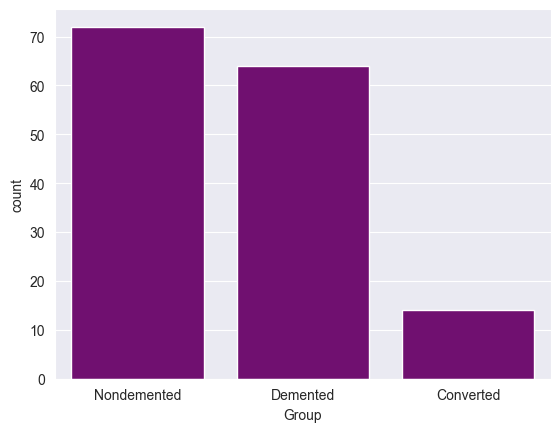

In [6]:
#Determine the number of people with Alzheimer's
#Exclude multiple visits from the same person to only include single visit data
import seaborn as sns
sns.set_style("darkgrid")
single_visit_data = df.loc[df['Visit'] == 1]
sns.countplot(x='Group', data=single_visit_data, color='purple')

<Axes: xlabel='Group', ylabel='count'>

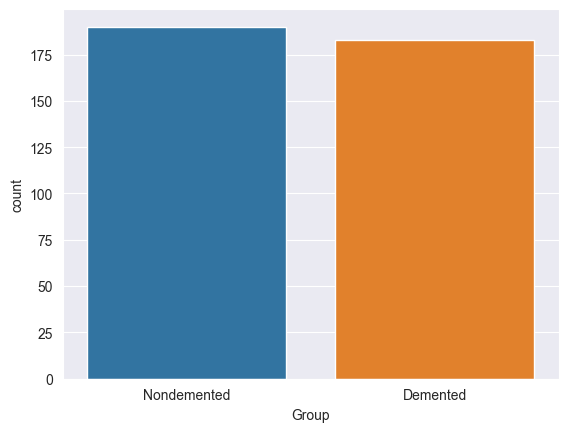

In [7]:
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
sns.countplot(x='Group', data=df)

              M    F
Demented     99   84
Nondemented  61  129


Text(0.5, 1.0, 'Gender and Demented Rate')

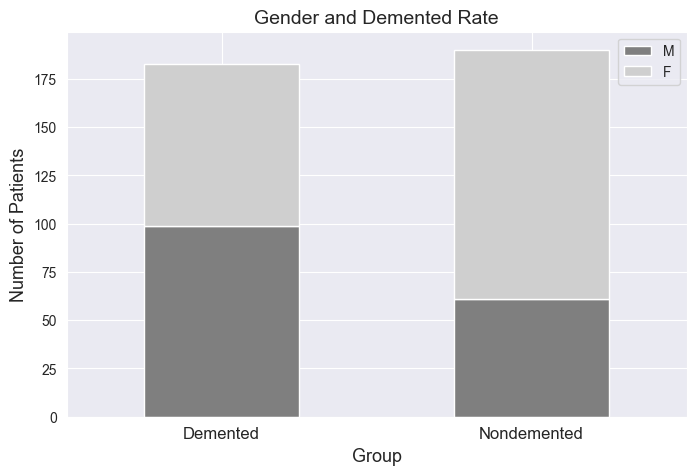

In [8]:
def create_bar_chart(feature):
    # Count the number of patients who are Demented for a given feature
    demented = df[df['Group']=='Demented'][feature].value_counts()
    # Count the number of patients who are Nondemented for a given feature
    nondemented = df[df['Group']=='Nondemented'][feature].value_counts()
    # Create a dataframe using the counts above
    df_bar = pd.DataFrame([demented, nondemented])
    df_bar.index = ['Demented', 'Nondemented']
    # Plot the bar chart
    df_bar.plot(kind='bar', stacked=True, figsize=(8, 5), color=['#7F7F7F', '#CFCFCF'])
    print(df_bar)

#Create a bar chart for Gender (Female=0, Male=1) and Group

create_bar_chart('M/F')
plt.xlabel('Group', fontsize=13)
plt.xticks(rotation=0, fontsize=12)
plt.ylabel('Number of Patients', fontsize=13)
plt.legend()
plt.title('Gender and Demented Rate', fontsize=14)

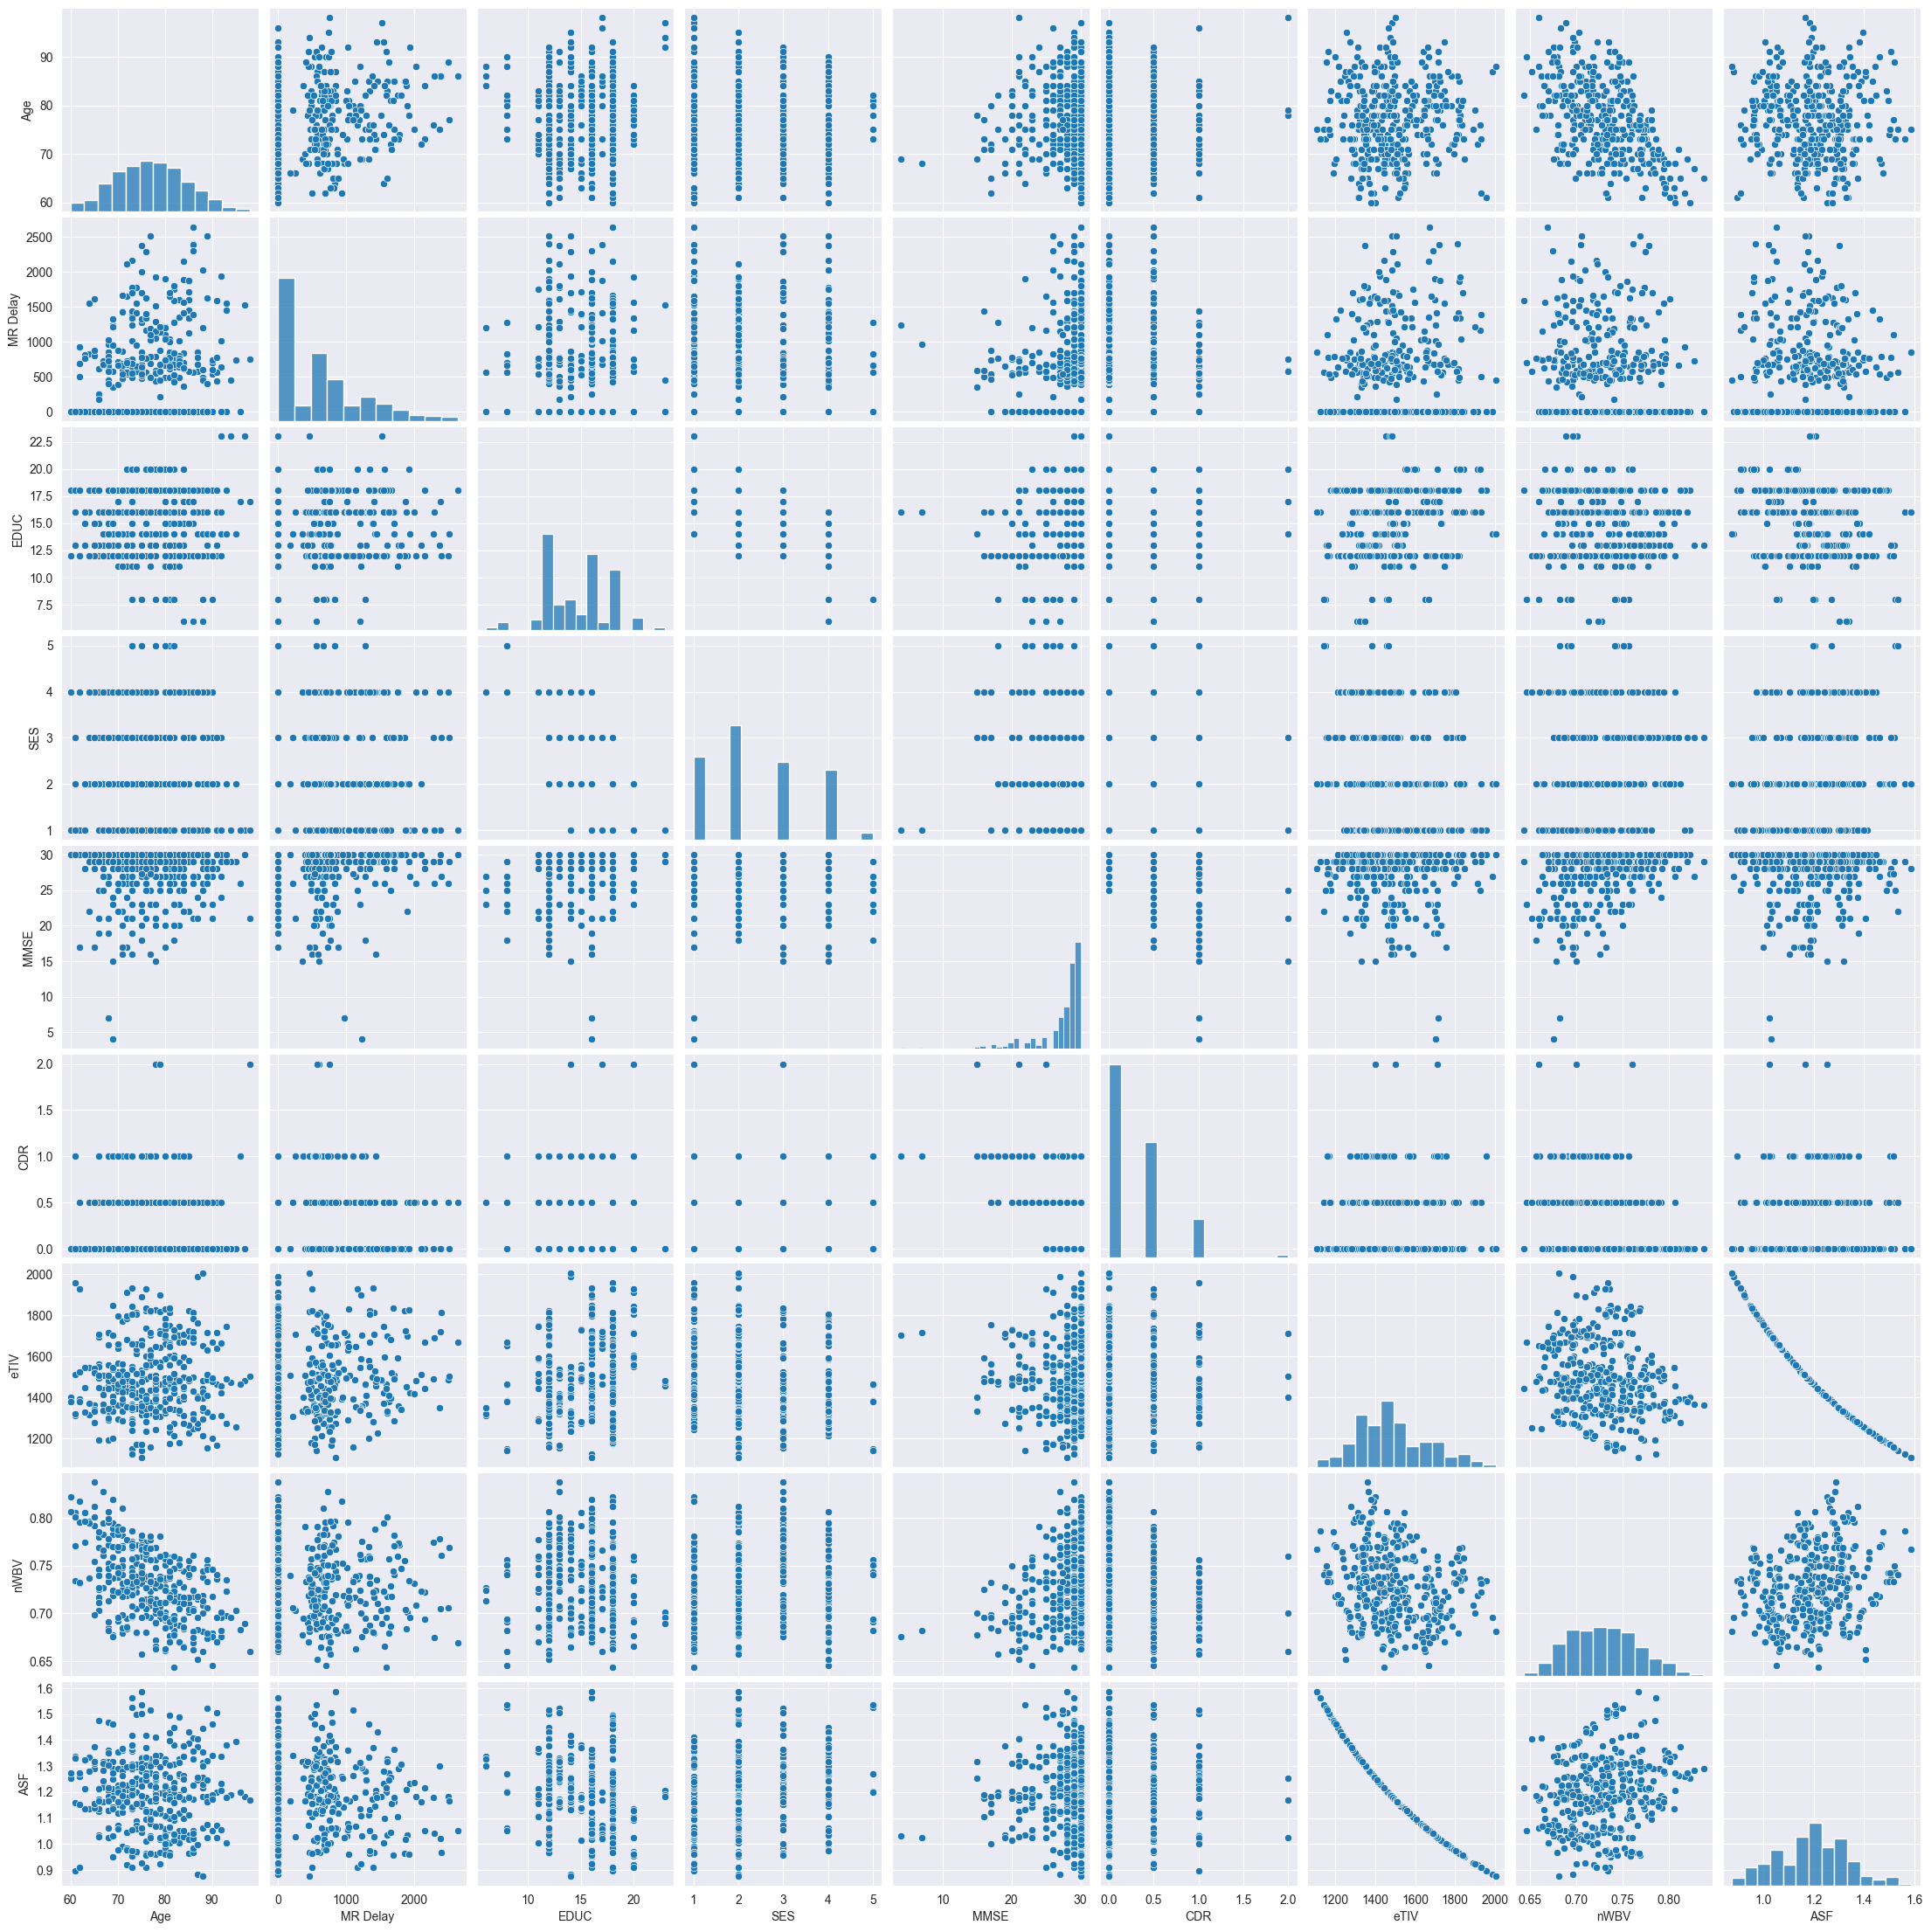

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
cols = ['Age','MR Delay', 'EDUC', 'SES', 'MMSE', 'CDR','eTIV','nWBV','ASF']
x=df.fillna('')
sns_plot = sns.pairplot(x[cols])

In [10]:
mapping = {"Demented": 1, "Nondemented": 0}

df['Group'] = df['Group'].map(mapping)
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])

In [11]:
def display_correlation_map(data_frame):
    correlation = data_frame.corr()
    _, ax = plt.subplots(figsize=(12, 10))
    color_map = sns.color_palette("coolwarm", as_cmap=True)
    _ = sns.heatmap(correlation, cmap=color_map, square=True, cbar_kws={'shrink': .9}, ax=ax, annot=True, annot_kws={'fontsize': 12})


C:\Users\sachin.sarathe\AppData\Local\Temp\ipykernel_16968\1833612303.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data_frame.corr()


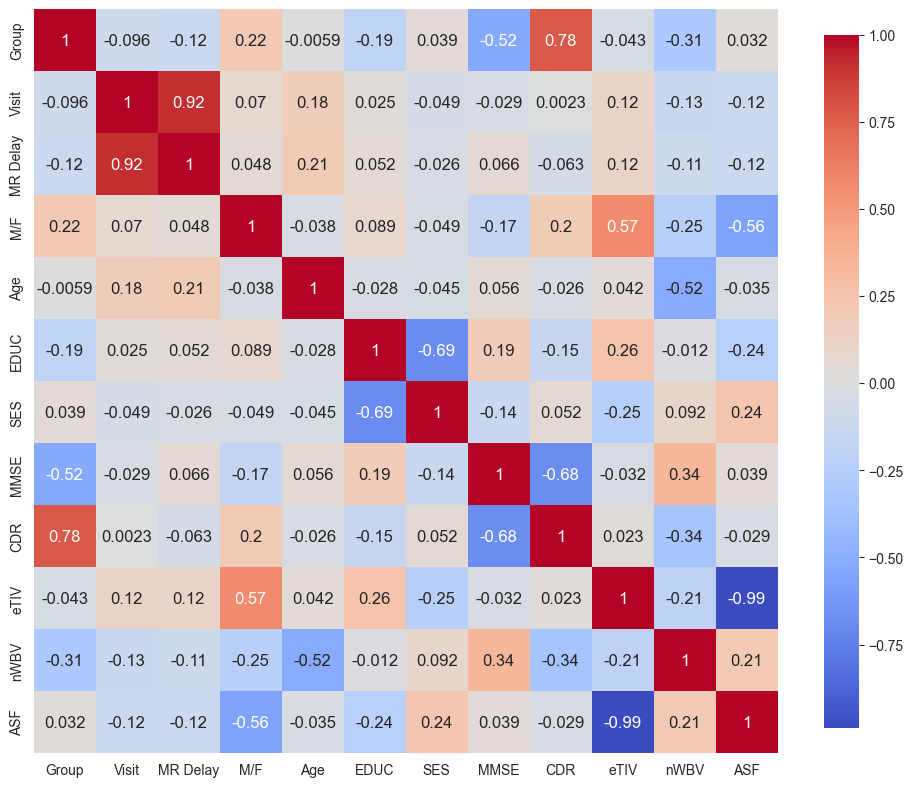

In [12]:
display_correlation_map(df)

# **Data Pre-Processing**

**Label Encoder**

In [13]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
  label_encoder = LabelEncoder()
  df[col] = label_encoder.fit_transform(df[col])

In [14]:
import random
from sklearn.model_selection import train_test_split

features = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted = ['Group']

X_data = df[features].values
y_data = df[predicted].values

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.30, random_state=random.randint(1,100))

**Standard Scaler**

In [15]:
from sklearn.preprocessing import StandardScaler
df_norm = df
scaler = StandardScaler()
df_norm[['Age','MR Delay','M/F','Hand','EDUC','SES','MMSE','eTIV','nWBV','ASF']]=scaler.fit_transform(df[['Age','MR Delay','M/F','Hand','EDUC','SES','MMSE','eTIV','nWBV','ASF']])

In [16]:
df_norm.head(3)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,0,0,-0.885832,1.153798,0.0,1.308738,-0.236267,-0.394466,-0.276517,0,1.807932,-0.936819,-1.850464
1,0,1,0,1,-0.655181,1.153798,0.0,1.439787,-0.236267,-0.394466,0.767946,0,1.820747,-1.392800,-1.864566
2,1,2,1,0,-0.885832,1.153798,0.0,-0.263856,-1.009316,-0.394466,-1.320979,1,1.128716,0.218333,-1.131246


In [17]:
df.drop(['Hand'], axis = 1, inplace = True, errors = 'ignore')
df.drop(['MR Delay','ASF'], axis = 1, inplace = True, errors = 'ignore')

In [18]:
df.head()

,Subject ID,MRI ID,Group,Visit,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
0,0,0,0,0,1.153798,1.308738,-0.236267,-0.394466,-0.276517,0,1.807932,-0.936819
1,0,1,0,1,1.153798,1.439787,-0.236267,-0.394466,0.767946,0,1.820747,-1.392800
2,1,2,1,0,1.153798,-0.263856,-1.009316,-0.394466,-1.320979,1,1.128716,0.218333
3,1,3,1,1,1.153798,-0.132806,-1.009316,-0.394466,0.245715,1,1.423470,-0.450439
4,1,4,1,2,1.153798,0.391392,-1.009316,-0.394466,-1.582095,1,1.218424,-0.784825


**Functions To Plot Results**

In [19]:
from sklearn import metrics

def plot_confusion_matrix(y_true, y_pred):
    cm = metrics.confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.GnBu)
    classes = ['Non-demented', 'Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j, i, f"{s[i][j]} = {cm[i][j]}")
    plt.show()


In [20]:
from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_matrix(y_test, model_test)

total_fpr = {}
total_tpr = {}
def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)
    total_fpr[str((str(model).split('(')[0]))] = fpr
    total_tpr[str((str(model).split('(')[0]))] = tpr
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [21]:
total_accuracy = {}
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu

# **Model Application**

In [22]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

**Random Forest**



Confusion Matrix:
[[57  4]
 [14 37]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        61
           1       0.90      0.73      0.80        51

    accuracy                           0.84       112
   macro avg       0.85      0.83      0.83       112
weighted avg       0.85      0.84      0.84       112



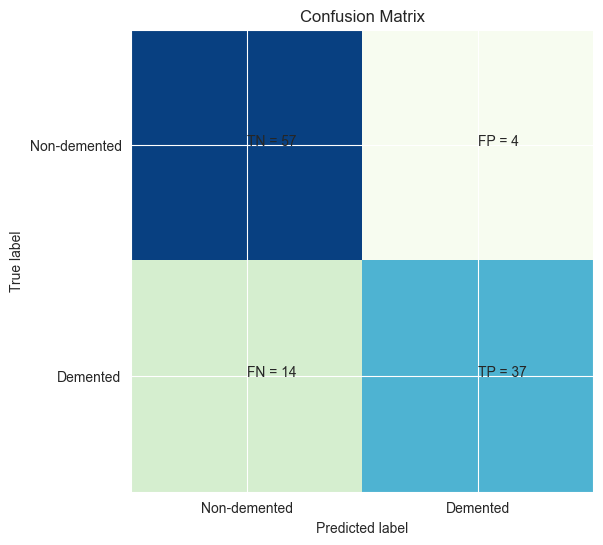

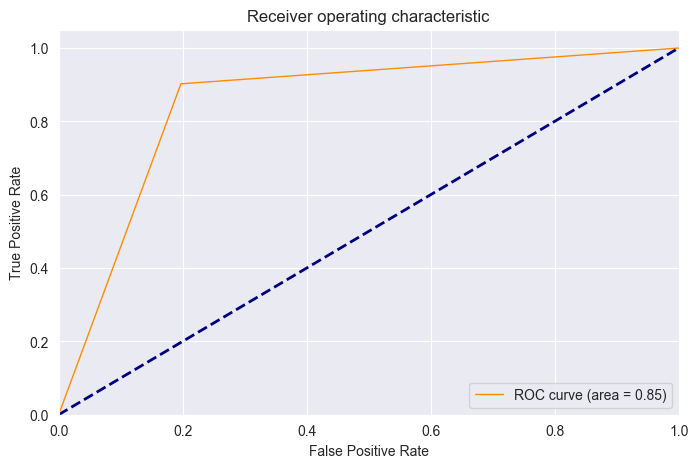


Acuuracy Of the Model:  0.8392857142857143 




In [24]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt', n_estimators=150)

param_grid = {
    'n_estimators': [150],
    'max_features': ['sqrt'],
    'max_depth' : [8,9,10,11,12],
    'criterion' :['entropy']
}

rfc.fit(X_train, y_train.ravel())
# print(rfc.best_params_)
report_performance(rfc) 
roc_curves(rfc)
accuracy(rfc)

plt.show()


**Random Forest with SearchCV & cross val**

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 164}


Confusion Matrix:
[[58  3]
 [18 33]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.95      0.85        61
           1       0.92      0.65      0.76        51

    accuracy                           0.81       112
   macro avg       0.84      0.80      0.80       112
weighted avg       0.83      0.81      0.81       112



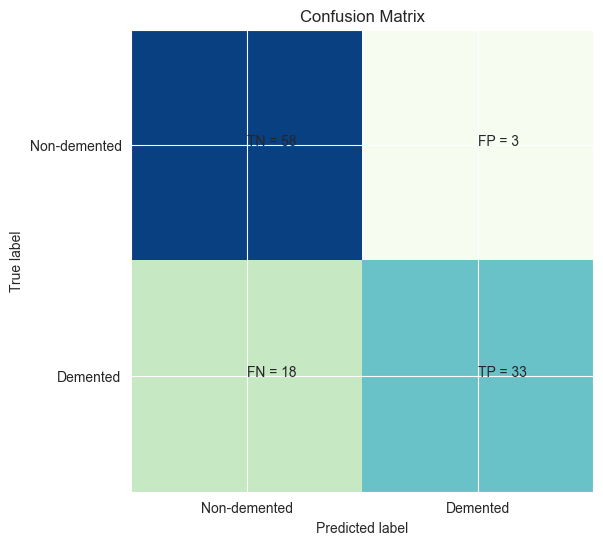

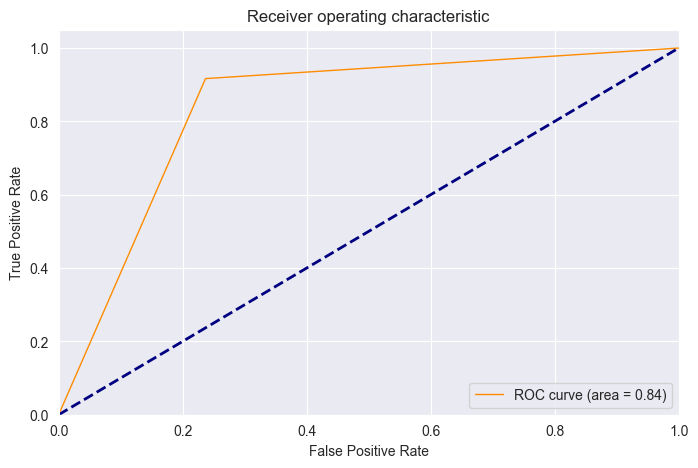


Acuuracy Of the Model:  0.8125 


Cross-validation Accuracy: 0.8161828737300436


In [25]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier()

param_dist = {
    'n_estimators': sp_randint(100, 1000),
    'max_features': ['sqrt', 'log2', None],
    'max_depth' : [None] + list(range(5, 31, 5)),
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 11),
    'bootstrap': [True, False],
    'criterion' : ['gini', 'entropy']
}

random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train.ravel())
print(random_search.best_params_)
report_performance(random_search.best_estimator_)
roc_curves(random_search.best_estimator_)
accuracy(random_search.best_estimator_)

cv_results = cross_val_score(random_search.best_estimator_, X_train, y_train.ravel(), cv=5)
print('Cross-validation Accuracy:', cv_results.mean())

plt.show()



**SVM**

In [40]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model_SVC = SVC()

In [41]:
SVC_GridSearch = GridSearchCV(estimator=model_SVC,param_grid=param_grid)
SVC_GridSearch.fit(X_train,y_train)
# Prediction_SVC = SVC_GridSearch.BestModelPridict(X_test)

print(SVC_GridSearch.best_params_)

{'C': 0.3, 'kernel': 'linear'}




Confusion Matrix:
[[58  3]
 [21 30]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.95      0.83        61
           1       0.91      0.59      0.71        51

    accuracy                           0.79       112
   macro avg       0.82      0.77      0.77       112
weighted avg       0.81      0.79      0.78       112



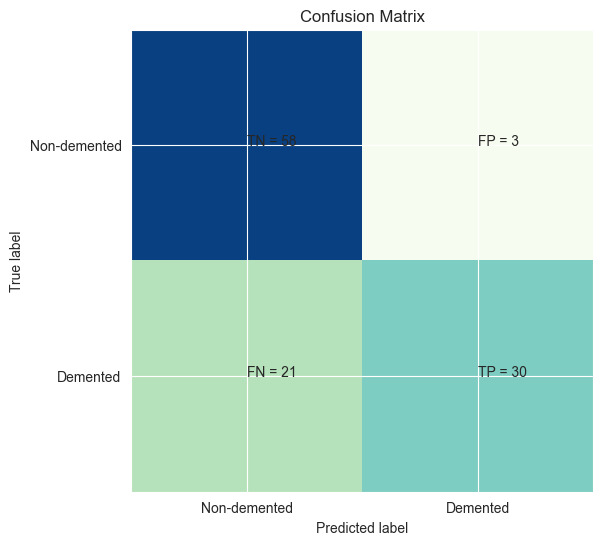

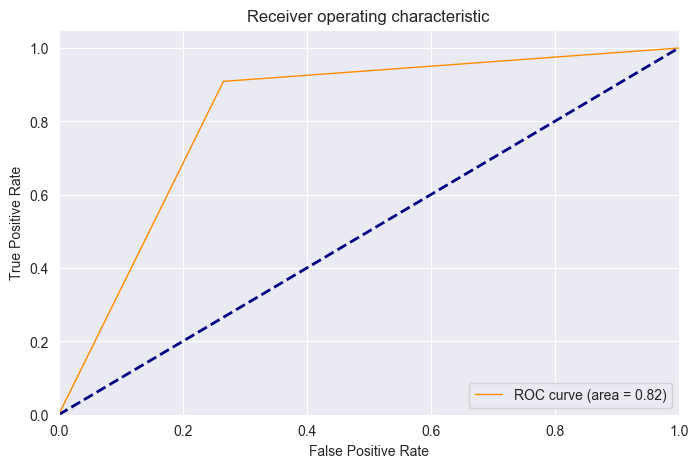


Acuuracy Of the Model:  0.7857142857142857 




In [43]:
# svc = SVC(kernel="linear", C=0.1, random_state=0)
svc = SVC(C=SVC_GridSearch.best_params_['C'],kernel=SVC_GridSearch.best_params_['kernel'],random_state=0)
svc.fit(X_train, y_train.ravel())


report_performance(svc) 
roc_curves(svc)
accuracy(svc)

**Decision Trees**



In [44]:
model1 = DecisionTreeClassifier()

# Tunning Params
param_grid = {  'criterion' : ['gini','entropy'],
                'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }

# Implement GridSearchCV
gsc1 = GridSearchCV(model1, param_grid, cv=10) # For 10 Cross-Validation
gsc1.fit(X_train,y_train)
print(gsc1.best_params_)

{'criterion': 'entropy', 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 6}




Confusion Matrix:
[[53  8]
 [20 31]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.87      0.79        61
           1       0.79      0.61      0.69        51

    accuracy                           0.75       112
   macro avg       0.76      0.74      0.74       112
weighted avg       0.76      0.75      0.74       112



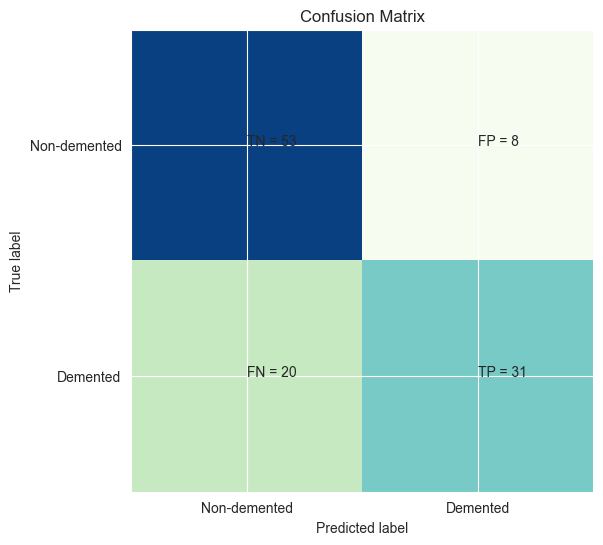

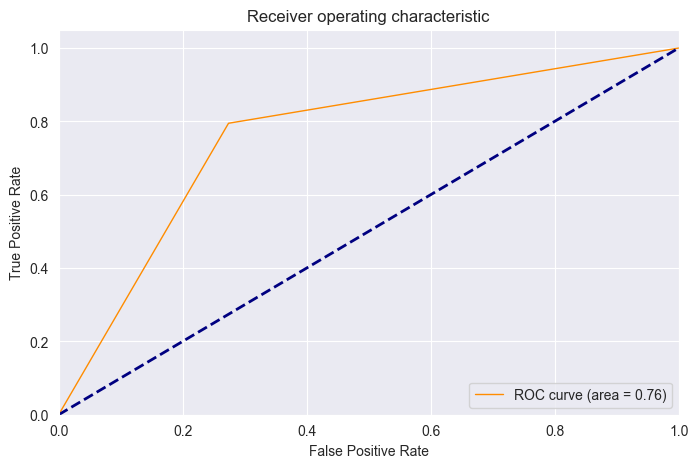


Acuuracy Of the Model:  0.75 




In [45]:
clf_dtc = DecisionTreeClassifier(criterion=gsc1.best_params_['criterion'],
                                 max_features=gsc1.best_params_['max_features'],
                                 min_samples_leaf=gsc1.best_params_['min_samples_leaf'],
                                 min_samples_split=gsc1.best_params_['min_samples_split'],
                                 random_state=0)
clf_dtc.fit(X_train, y_train.ravel())


report_performance(clf_dtc) 
roc_curves(clf_dtc)
accuracy(clf_dtc)

plt.show()

**XGboost**

{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}


Confusion Matrix:
[[53  8]
 [14 37]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        61
           1       0.82      0.73      0.77        51

    accuracy                           0.80       112
   macro avg       0.81      0.80      0.80       112
weighted avg       0.81      0.80      0.80       112



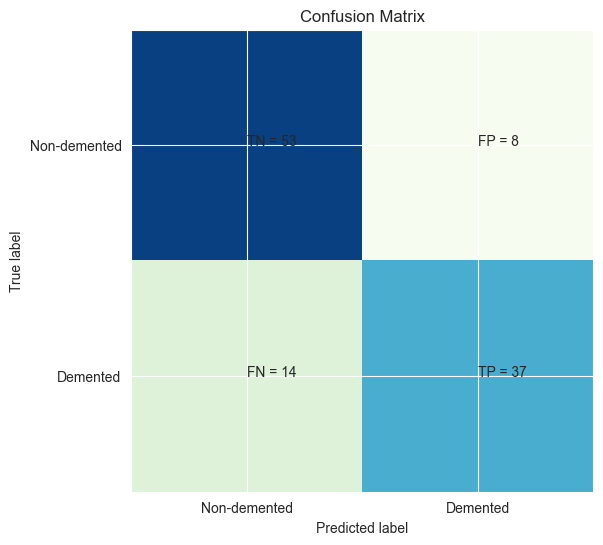

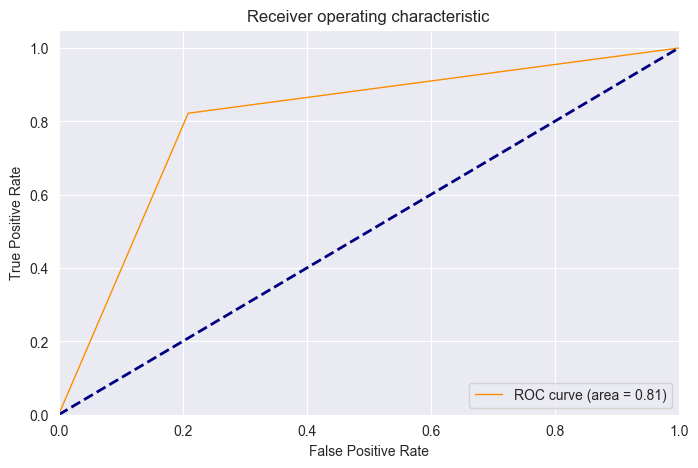


Acuuracy Of the Model:  0.8035714285714286 




In [46]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [1,2,3,4,5]
}

clf_xgb = XGBClassifier(random_state=0)
grid_search = GridSearchCV(clf_xgb, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train.ravel())
print(grid_search.best_params_)
report_performance(grid_search.best_estimator_)
roc_curves(grid_search.best_estimator_)
accuracy(grid_search.best_estimator_)


### KNN

{'leaf_size': 1, 'n_neighbors': 1, 'weights': 'distance'}


Confusion Matrix:
[[46 15]
 [12 39]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        61
           1       0.72      0.76      0.74        51

    accuracy                           0.76       112
   macro avg       0.76      0.76      0.76       112
weighted avg       0.76      0.76      0.76       112



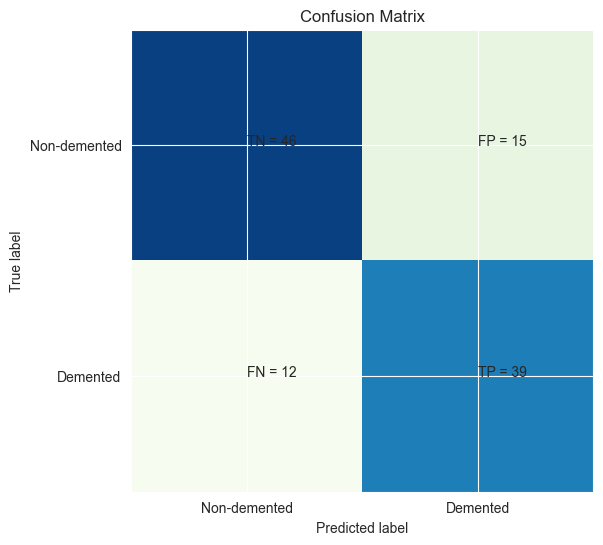

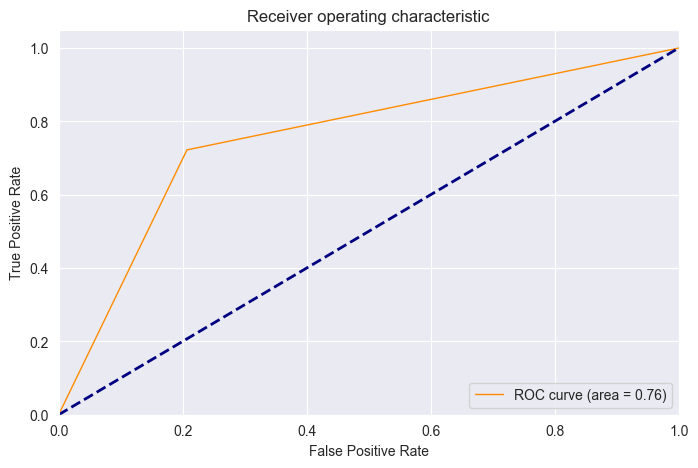


Acuuracy Of the Model:  0.7589285714285714 




In [47]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

# Define the parameter grid to search
param_grid = {
    'n_neighbors': list(range(1, 30)),
    'leaf_size': list(range(1,30)),
    'weights': [ 'distance', 'uniform' ]
}

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train.ravel())
print(grid_search.best_params_)

report_performance(grid_search.best_estimator_)
roc_curves(grid_search.best_estimator_)
accuracy(grid_search.best_estimator_)

## Logistic Regression

In [31]:
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
# model
model = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2','elasticnet']

# Create regularization hyperparameter distribution using uniform distribution
C = [0.01,0.1,1,10]
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

{'C': 10, 'penalty': 'l2'}


Confusion Matrix:
[[56  5]
 [18 33]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        61
           1       0.87      0.65      0.74        51

    accuracy                           0.79       112
   macro avg       0.81      0.78      0.79       112
weighted avg       0.81      0.79      0.79       112



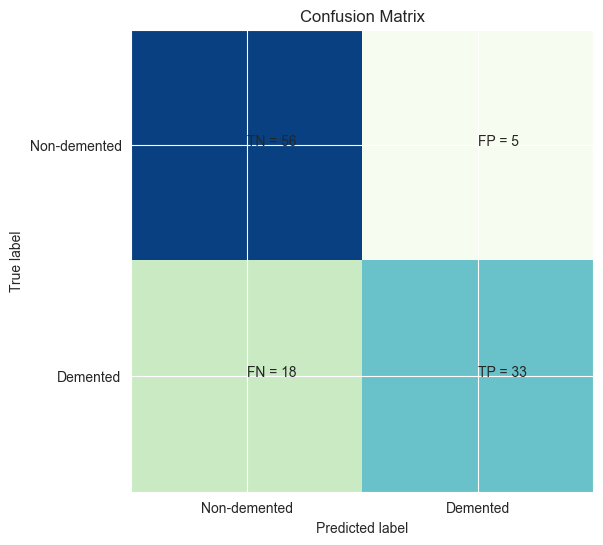

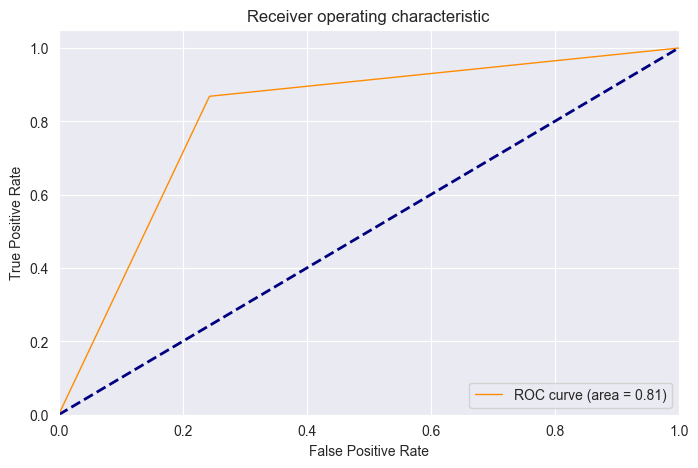


Acuuracy Of the Model:  0.7946428571428571 




In [32]:
grid_search = GridSearchCV(model, param_grid=hyperparameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train.ravel())
print(grid_search.best_params_)

report_performance(grid_search.best_estimator_)
roc_curves(grid_search.best_estimator_)
accuracy(grid_search.best_estimator_)

### Adaboost

In [33]:
model = AdaBoostClassifier()

hyperparameters = {
    'n_estimators': [50, 100, 200, 400],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}



{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}


Confusion Matrix:
[[56  5]
 [22 29]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.92      0.81        61
           1       0.85      0.57      0.68        51

    accuracy                           0.76       112
   macro avg       0.79      0.74      0.74       112
weighted avg       0.78      0.76      0.75       112



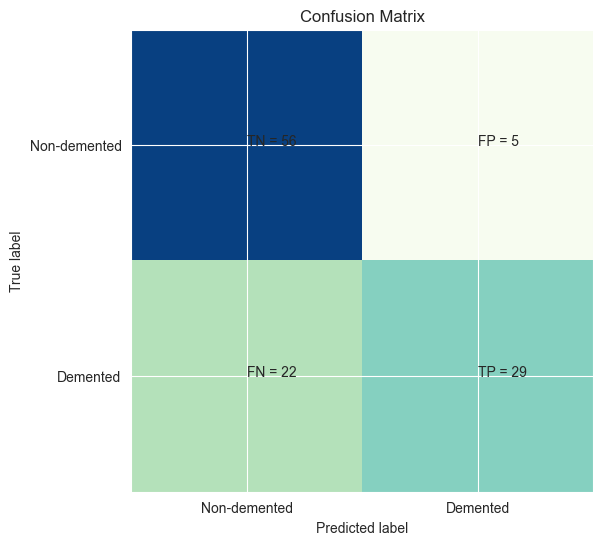

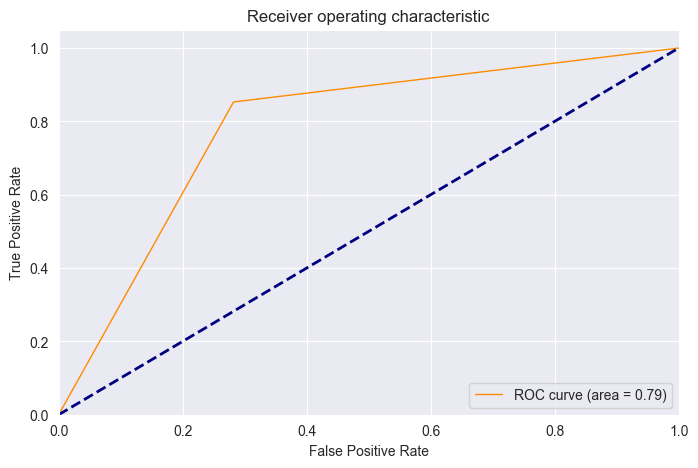


Acuuracy Of the Model:  0.7589285714285714 




In [34]:
grid_search = GridSearchCV(model, param_grid=hyperparameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train.ravel())
print(grid_search.best_params_)


report_performance(grid_search.best_estimator_)
roc_curves(grid_search.best_estimator_)
accuracy(grid_search.best_estimator_)

# **Model Results**

In [35]:
data = total_accuracy.values()
labels = total_accuracy.keys()

Text(0, 0.5, 'Accuracy')

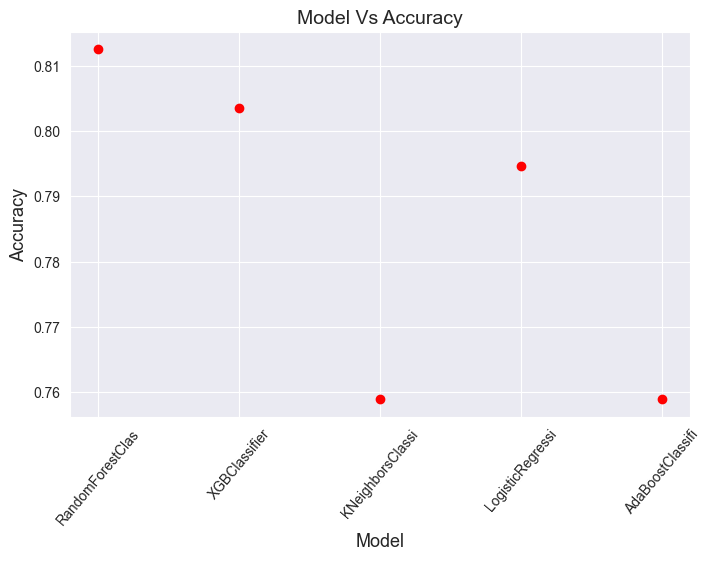

In [36]:
plt.plot([i for i, e in enumerate(data)], data, 'ro'); plt.xticks([i for i, e in enumerate(labels)], [l[0:16] for l in labels])
plt.title("Model Vs Accuracy",fontsize = 14)
plt.xlabel('Model',fontsize = 13)
plt.xticks(rotation = 50)
plt.ylabel('Accuracy',fontsize = 13)

**ROC of proposed models**

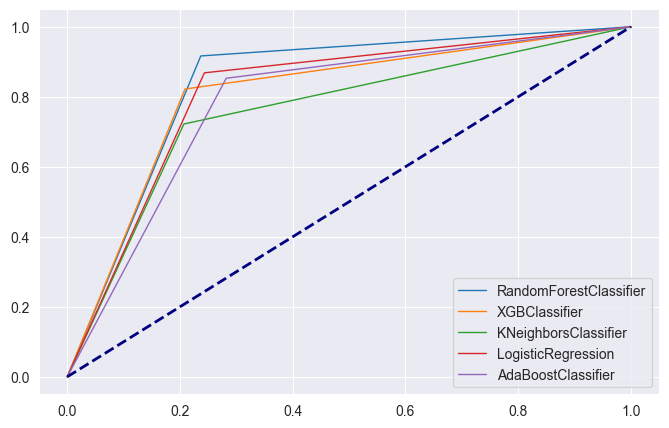

In [37]:
for i in total_fpr.keys():
    plt.plot(total_fpr[i],total_tpr[i],lw=1, label=i)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend()

In [48]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Row Number","Model Name","Hyperparameters", "Accuracy"]
x.add_row([1,"LogisticRegression","{'C': 10, 'penalty': 'l2'}","79.4 %"])
x.add_row([2,"KNN","{'leaf_size': 1, 'n_neighbors': 1, 'weights': 'distance'}","75.89 %"])
x.add_row([3,"SVM","{'C': 0.3, 'kernel': 'linear'}","78.5 %"])
x.add_row([4,"Decision Tree","{'criterion': 'entropy', 'max_features': 'log2',\n 'min_samples_leaf': 2, 'min_samples_split': 6}","75 %"])
x.add_row([5,"Adaboost","{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}","75.89 %"])

In [49]:
print(x)

+------------+--------------------+---------------------------------------------------------------------+----------+
| Row Number |     Model Name     |                           Hyperparameters                           | Accuracy |
+------------+--------------------+---------------------------------------------------------------------+----------+
|     1      | LogisticRegression |                      {'C': 10, 'penalty': 'l2'}                     |  79.4 %  |
|     2      |        KNN         |      {'leaf_size': 1, 'n_neighbors': 1, 'weights': 'distance'}      | 75.89 %  |
|     3      |        SVM         |                    {'C': 0.3, 'kernel': 'linear'}                   |  78.5 %  |
|     4      |   Decision Tree    |           {'criterion': 'entropy', 'max_features': 'log2',          |   75 %   |
|            |                    |            'min_samples_leaf': 2, 'min_samples_split': 6}           |          |
|     5      |      Adaboost      | {'algorithm': 'SAMME.R', 'le

### Creating Ensembles/ Stacking of all models

In [51]:
from sklearn.metrics import accuracy_score
def ensemble_models(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    # Calculate accuracy
    acc = accuracy_score(y_test,y_pred)
    return acc

In [52]:
# final_y = []
y1 = ensemble_models(LogisticRegression(C=10,penalty='l2'))
y2 = ensemble_models(KNeighborsClassifier(n_neighbors=1,leaf_size=1,weights='distance'))
y3 = ensemble_models(SVC(C=0.3,kernel='linear'))
y4 = ensemble_models(DecisionTreeClassifier(criterion='entropy',max_features='log2',min_samples_leaf=2,min_samples_split=6))
y5 = ensemble_models(AdaBoostClassifier(learning_rate=0.1,n_estimators=100,algorithm='SAMME.R'))
final_y = np.array([y1,y2,y3,y4,y5])

print(f"The overall accuracy after emsembling/stacking the models is {np.round(final_y.mean(),2)*100} %")

The overall accuracy after emsembling/stacking the models is 77.0 %
